In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from pprint import pprint
%matplotlib inline

In [2]:
start = datetime(2004,1,1)
end = datetime(2016,1,1)
test_size=0.5

In [3]:
amzn = pdr.get_data_yahoo('AAPL', start, end)
amzn.drop(['Close', 'Volume'], axis=1, inplace=True)

In [4]:
amzn.columns = ['Open', 'High', 'Low', 'Close'] # Adj Close -> Close

In [5]:
amzn.head()

,Open,High,Low,Close
Date,,,,
2014-12-31,112.820000,113.129997,110.209999,104.863991
2015-01-02,111.389999,111.440002,107.349998,103.866470
2015-01-05,108.290001,108.650002,105.410004,100.940392
2015-01-06,106.540001,107.430000,104.629997,100.949890
2015-01-07,107.199997,108.199997,106.699997,102.365440


### Create percentage change list

In [6]:
amzn_pct = pd.concat((amzn, 
                      amzn.rolling(5,  min_periods=5).mean(), 
                      amzn.rolling(10, min_periods=10).mean(), 
                      amzn.rolling(20, min_periods=20).mean(),
                      amzn.rolling(5,  min_periods=5).std(), 
                      amzn.rolling(10, min_periods=10).std(),
                      amzn.rolling(20, min_periods=20).std()), 
                      axis=1)

In [7]:
amzn_pct.head()

,Open,High,Low,Close,Open,High,Low,Close,Open,High,...,Low,Close,Open,High,Low,Close,Open,High,Low,Close
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,112.820000,113.129997,110.209999,104.863991,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,111.389999,111.440002,107.349998,103.866470,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,108.290001,108.650002,105.410004,100.940392,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,106.540001,107.430000,104.629997,100.949890,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,107.199997,108.199997,106.699997,102.365440,109.248,109.77,106.859999,102.597237,NaN,NaN,...,2.154274,1.750839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
amzn_pct = amzn_pct.pct_change()[20:]

In [9]:
amzn_pct.head()

,Open,High,Low,Close,Open,High,Low,Close,Open,High,...,Low,Close,Open,High,Low,Close,Open,High,Low,Close
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-30,0.017882,0.006796,0.011163,-0.014634,0.010657,0.010815,0.009429,0.007341,0.007524,0.008812,...,0.136035,0.060774,0.150320,0.129019,0.096430,0.013005,0.138821,0.154936,0.154402,0.105880
2015-02-02,-0.002956,-0.006917,-0.006590,0.012547,0.007450,0.008234,0.005759,0.009641,0.009797,0.010185,...,0.017120,0.055185,-0.038330,-0.075709,-0.077138,-0.057063,0.096348,0.086068,0.078329,0.111541
2015-02-03,0.003812,-0.000671,0.013181,0.000169,0.010432,0.011223,0.014978,0.016421,0.009385,0.008803,...,-0.699149,-0.620899,-0.078080,-0.112782,-0.062261,-0.030794,0.060591,0.034249,0.062935,0.041428
2015-02-04,0.000000,0.011924,0.005952,0.007670,0.001477,0.004013,0.005160,0.007220,0.008329,0.008149,...,0.175044,-0.420981,-0.124611,-0.059614,-0.046541,-0.043813,0.008414,0.020042,0.033068,0.033861
2015-02-05,0.012827,-0.002323,0.007945,0.007137,0.006274,0.001739,0.006314,0.002552,0.008442,0.006637,...,0.108642,0.381080,-0.112461,-0.081175,-0.026765,0.029650,0.028137,0.003634,0.059845,0.048342


In [10]:
scale_to_idx = int((1-test_size)*len(amzn_pct))
scale_to_idx

242

In [11]:
scaler = StandardScaler()
scaler.fit(amzn_pct.iloc[:scale_to_idx])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
amzn_pct = pd.DataFrame(scaler.transform(amzn_pct), columns=amzn_pct.columns, index=amzn_pct.index)

In [13]:
amzn_pct.head(6)

,Open,High,Low,Close,Open,High,Low,Close,Open,High,...,Low,Close,Open,High,Low,Close,Open,High,Low,Close
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-30,0.837373,0.526944,0.617940,-0.862549,1.587039,1.819989,1.305456,1.128782,1.678176,2.077320,...,0.117675,-0.004248,0.599296,0.589995,0.403367,-0.011666,1.577212,1.964408,1.831453,1.277529
2015-02-02,-0.113422,-0.449214,-0.315078,0.799854,1.133512,1.407572,0.827139,1.459624,2.159630,2.386902,...,-0.127107,-0.017415,-0.260764,-0.479342,-0.475539,-0.379983,1.075569,1.066560,0.898828,1.348923
2015-02-03,0.195391,-0.004624,0.723974,0.042793,1.555264,1.885210,2.028762,2.434897,2.072367,2.075412,...,-1.601518,-1.610111,-0.441982,-0.672979,-0.400202,-0.241897,0.653236,0.390973,0.710106,0.464734
2015-02-04,0.021459,0.891989,0.344058,0.501566,0.288716,0.733021,0.749059,1.111416,1.848821,1.927820,...,0.197973,-1.139151,-0.654122,-0.395276,-0.320601,-0.310334,0.036974,0.205752,0.343946,0.369308
2015-02-05,0.606733,-0.122235,0.448824,0.469010,0.967100,0.369682,0.899493,0.440042,1.872721,1.587028,...,0.061286,0.750319,-0.598729,-0.507892,-0.220459,0.075827,0.269923,-0.008174,0.672229,0.551922
2015-02-06,0.021459,0.055006,-0.321332,-0.482544,0.465849,0.158445,0.431135,0.614795,1.487118,1.335753,...,-0.233807,-1.068430,-0.518521,-0.533564,-0.312426,-0.227780,0.364822,0.447359,0.463811,0.525353


### Helper class and functions

In [14]:
class TradeDTO:
    
    LONG = 'long'
    SHORT = 'short'
    
    def __init__(self, pct_data, enter_day, exit_day):
        self.pct_data = pct_data
        self.enter_day = enter_day
        self.exit_day = exit_day
        
        self.hold_days = len(amzn[self.enter_day.name:self.exit_day.name]) - 1
        self.price_diff = self.exit_day['Close'] - self.enter_day['Close']
        self.direction = TradeDTO.LONG if self.price_diff > 0 else TradeDTO.SHORT
        
    def __repr__(self):
        return 'From {} to {} | enter {} | exit {} | {} | {} hold days | {} diff'.format(
            self.pct_data.iloc[0].name.date(),
            self.pct_data.iloc[-1].name.date(),
            self.enter_day.name.date(),
            self.exit_day.name.date(),
            self.direction,
            self.hold_days,
            self.price_diff)
    
    def to_label(self):
        return self.direction# + '_' + str(self.hold_days)# + '_' + ('BREAKOUT' if self.hold_days <= 1 else 'NOPE')

### Parameters for trade collecting

In [15]:
min_hold_days = 1
max_hold_days = 10
hold_days_diff = max_hold_days - min_hold_days
window = 30

In [16]:
positions = []
for i in range(window, len(amzn_pct) - max_hold_days):
    pct_data_part = amzn_pct.iloc[i - window : i]
    last_index_of_pct_data_part = pct_data_part.iloc[-1].name.date()
    
    start_idx = amzn.index.get_loc(last_index_of_pct_data_part)
    
    current_day = amzn.iloc[start_idx]
    check_data_part = amzn.iloc[start_idx + min_hold_days : 
                                start_idx + max_hold_days]
    
    max_ev_date = np.argmax(np.abs(current_day['Close'] - check_data_part['Close']))
    target_day = check_data_part.loc[max_ev_date]
    
    #print('- {} days: {} to {}'.format(str(day_diff), current_day.name.date(), target_day.name.date()))
    trade = TradeDTO(pct_data_part, current_day, target_day)
    positions.append(trade)

In [17]:
#np.random.shuffle(positions)

In [18]:
pprint(positions)

[From 2015-01-30 to 2015-03-13 | enter 2015-03-13 | exit 2015-03-18 | long | 3 hold days | 4.654434000000009 diff,
 From 2015-02-02 to 2015-03-16 | enter 2015-03-16 | exit 2015-03-18 | long | 2 hold days | 3.357299999999995 diff,
 From 2015-02-03 to 2015-03-17 | enter 2015-03-17 | exit 2015-03-27 | short | 8 hold days | -3.6147989999999908 diff,
 From 2015-02-04 to 2015-03-18 | enter 2015-03-18 | exit 2015-03-27 | short | 7 hold days | -4.9787060000000025 diff,
 From 2015-02-05 to 2015-03-19 | enter 2015-03-19 | exit 2015-03-27 | short | 6 hold days | -4.053550999999999 diff,
 From 2015-02-06 to 2015-03-20 | enter 2015-03-20 | exit 2015-03-27 | short | 5 hold days | -2.527511000000004 diff,
 From 2015-02-09 to 2015-03-23 | enter 2015-03-23 | exit 2015-03-27 | short | 4 hold days | -3.7769469999999927 diff,
 From 2015-02-10 to 2015-03-24 | enter 2015-03-24 | exit 2015-03-27 | short | 3 hold days | -3.280990000000017 diff,
 From 2015-02-11 to 2015-03-25 | enter 2015-03-25 | exit 2015-04-

# Train Keras NN

### Setup X_train, X_test, etc

In [19]:
X = np.array([x.pct_data.values for x in positions])
X.shape

(445, 30, 28)

In [20]:
lb = LabelBinarizer()
y = lb.fit_transform([x.to_label() for x in positions])
if y.shape[1] == 1:
    y = np.hstack((y, 1 - y))
y.shape

(445, 2)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

Scaling dataset size should be equal to the train set + window size

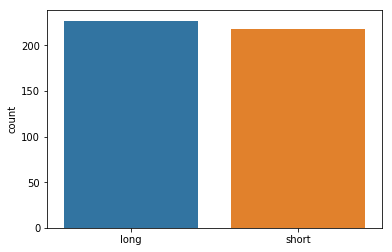

In [22]:
sns.countplot([x.to_label() for x in positions])

### Build model

In [23]:
batch_size = 128
epochs = 150

In [24]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.losses import mean_squared_error, categorical_crossentropy
from keras.optimizers import Adam
from keras import metrics

Using TensorFlow backend.


In [25]:
model = Sequential()
model.add(Conv1D(32,  3, activation='relu', padding='same', input_shape=X[0].shape))
model.add(Conv1D(64,  4, activation='relu', padding='same'))
model.add(Conv1D(128, 5, activation='relu', padding='same'))
model.add(Conv1D(256, 6, activation='relu', padding='same'))

In [26]:
model.add(Flatten())

for i in range(6,0,-1):
    model.add(Dense(i*64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

model.add(Dense(y.shape[1]))
model.add(Activation('softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=[metrics.mae, metrics.categorical_accuracy])

In [27]:
import os.path
FILE_PATH = 'AAPL.hdf5'

In [28]:
if os.path.exists(FILE_PATH):
    model.load_weights(FILE_PATH)
else:
    # Fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)
    model.save_weights(FILE_PATH, overwrite=True)

Train on 222 samples, validate on 223 samples
Epoch 1/150
222/222 [==============================] - 5s - loss: 0.7782 - mean_absolute_error: 0.5163 - categorical_accuracy: 0.4505 - val_loss: 0.6988 - val_mean_absolute_error: 0.5025 - val_categorical_accuracy: 0.4081
Epoch 2/150
222/222 [==============================] - 0s - loss: 0.7556 - mean_absolute_error: 0.5057 - categorical_accuracy: 0.4820 - val_loss: 0.7086 - val_mean_absolute_error: 0.5054 - val_categorical_accuracy: 0.4126
Epoch 3/150
222/222 [==============================] - 0s - loss: 0.7272 - mean_absolute_error: 0.5002 - categorical_accuracy: 0.5000 - val_loss: 0.7082 - val_mean_absolute_error: 0.5052 - val_categorical_accuracy: 0.4126
Epoch 4/150
222/222 [==============================] - 0s - loss: 0.7379 - mean_absolute_error: 0.5067 - categorical_accuracy: 0.4820 - val_loss: 0.7073 - val_mean_absolute_error: 0.5050 - val_categorical_accuracy: 0.4126
Epoch 5/150
222/222 [==============================] - 0s - loss: 

222/222 [==============================] - 0s - loss: 0.3578 - mean_absolute_error: 0.2609 - categorical_accuracy: 0.9099 - val_loss: 1.3013 - val_mean_absolute_error: 0.5428 - val_categorical_accuracy: 0.4036
Epoch 38/150
222/222 [==============================] - 0s - loss: 0.3419 - mean_absolute_error: 0.2507 - categorical_accuracy: 0.9324 - val_loss: 1.8513 - val_mean_absolute_error: 0.5643 - val_categorical_accuracy: 0.4260
Epoch 39/150
222/222 [==============================] - 0s - loss: 0.3466 - mean_absolute_error: 0.2415 - categorical_accuracy: 0.8694 - val_loss: 1.2837 - val_mean_absolute_error: 0.5451 - val_categorical_accuracy: 0.4170
Epoch 40/150
222/222 [==============================] - 0s - loss: 0.3333 - mean_absolute_error: 0.2478 - categorical_accuracy: 0.9820 - val_loss: 1.2228 - val_mean_absolute_error: 0.5384 - val_categorical_accuracy: 0.4305
Epoch 41/150
222/222 [==============================] - 0s - loss: 0.3183 - mean_absolute_error: 0.2358 - categorical_acc

222/222 [==============================] - 0s - loss: 0.1176 - mean_absolute_error: 0.1015 - categorical_accuracy: 1.0000 - val_loss: 3.6985 - val_mean_absolute_error: 0.5786 - val_categorical_accuracy: 0.4036
Epoch 74/150
222/222 [==============================] - 0s - loss: 0.1086 - mean_absolute_error: 0.0945 - categorical_accuracy: 1.0000 - val_loss: 3.9546 - val_mean_absolute_error: 0.5838 - val_categorical_accuracy: 0.4126
Epoch 75/150
222/222 [==============================] - 0s - loss: 0.0798 - mean_absolute_error: 0.0712 - categorical_accuracy: 1.0000 - val_loss: 4.2269 - val_mean_absolute_error: 0.5874 - val_categorical_accuracy: 0.4081
Epoch 76/150
222/222 [==============================] - 0s - loss: 0.0734 - mean_absolute_error: 0.0657 - categorical_accuracy: 1.0000 - val_loss: 4.4525 - val_mean_absolute_error: 0.5886 - val_categorical_accuracy: 0.4081
Epoch 77/150
222/222 [==============================] - 0s - loss: 0.0662 - mean_absolute_error: 0.0596 - categorical_acc

222/222 [==============================] - 0s - loss: 0.0090 - mean_absolute_error: 0.0087 - categorical_accuracy: 1.0000 - val_loss: 3.1097 - val_mean_absolute_error: 0.5079 - val_categorical_accuracy: 0.4888
Epoch 110/150
222/222 [==============================] - 0s - loss: 0.0092 - mean_absolute_error: 0.0086 - categorical_accuracy: 1.0000 - val_loss: 3.4576 - val_mean_absolute_error: 0.5212 - val_categorical_accuracy: 0.4619
Epoch 111/150
222/222 [==============================] - 0s - loss: 0.0080 - mean_absolute_error: 0.0077 - categorical_accuracy: 1.0000 - val_loss: 3.7387 - val_mean_absolute_error: 0.5313 - val_categorical_accuracy: 0.4619
Epoch 112/150
222/222 [==============================] - 0s - loss: 0.0048 - mean_absolute_error: 0.0047 - categorical_accuracy: 1.0000 - val_loss: 3.9548 - val_mean_absolute_error: 0.5382 - val_categorical_accuracy: 0.4619
Epoch 113/150
222/222 [==============================] - 0s - loss: 0.0084 - mean_absolute_error: 0.0077 - categorical

222/222 [==============================] - 0s - loss: 6.3433e-04 - mean_absolute_error: 6.3045e-04 - categorical_accuracy: 1.0000 - val_loss: 6.4336 - val_mean_absolute_error: 0.5565 - val_categorical_accuracy: 0.4395
Epoch 146/150
222/222 [==============================] - 0s - loss: 0.0143 - mean_absolute_error: 0.0097 - categorical_accuracy: 0.9910 - val_loss: 6.4370 - val_mean_absolute_error: 0.5587 - val_categorical_accuracy: 0.4439
Epoch 147/150
222/222 [==============================] - 0s - loss: 0.0012 - mean_absolute_error: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 6.4222 - val_mean_absolute_error: 0.5600 - val_categorical_accuracy: 0.4395
Epoch 148/150
222/222 [==============================] - 0s - loss: 8.9376e-04 - mean_absolute_error: 8.8579e-04 - categorical_accuracy: 1.0000 - val_loss: 6.4009 - val_mean_absolute_error: 0.5608 - val_categorical_accuracy: 0.4484
Epoch 149/150
222/222 [==============================] - 0s - loss: 5.9036e-04 - mean_absolute_error: 

In [29]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=3)
print("Accuracy: %.2f%%" % (scores[2]*100))

Accuracy: 43.05%


In [30]:
predicted = model.predict(X_test, batch_size=32)

In [31]:
predicted = predicted.argmax(axis=1)

In [32]:
y_test = y_test.argmax(axis=1)

In [33]:
confusion_matrix(y_test, predicted)

array([[ 65,  27],
       [100,  31]], dtype=int64)

In [34]:
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.39      0.71      0.51        92
          1       0.53      0.24      0.33       131

avg / total       0.48      0.43      0.40       223



# Backtrader test

Beginner date is: 2008-09-11

In [35]:
import backtrader as bt

In [36]:
class TestStrategy(bt.Strategy):
    
    params = dict(window=31)
    
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma5 = bt.indicators.SimpleMovingAverage(self.datas[0], period=5)
        self.sma10 = bt.indicators.SimpleMovingAverage(self.datas[0], period=10)
        self.sma20 = bt.indicators.SimpleMovingAverage(self.datas[0], period=20)
        
        self.std5 = bt.indicators.StandardDeviation(self.datas[0], period=5)
        self.std10 = bt.indicators.StandardDeviation(self.datas[0], period=10)
        self.std20 = bt.indicators.StandardDeviation(self.datas[0], period=20)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enougth cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:
            pass
#             self.log('BUY CREATE, %.2f' % self.dataclose[0])
#             self.order = self.buy()
        else:
            pass
#             self.log('SELL CREATE, %.2f' % self.dataclose[0])
#             self.order = self.sell()


Starting Portfolio Value: 10000.00
Final Portfolio Value: 10000.00


c:\programdata\anaconda3\envs\trading3\lib\site-packages\backtrader\plot\__init__.py:30: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "c:\programdata\anaconda3\envs\trading3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\programdata\anaconda3\envs\trading3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\programdata\anaconda3\envs\trading3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\programdata\anaconda3\envs\trading3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\programdata\anaconda3\envs\trading3\lib\site-packages\ip

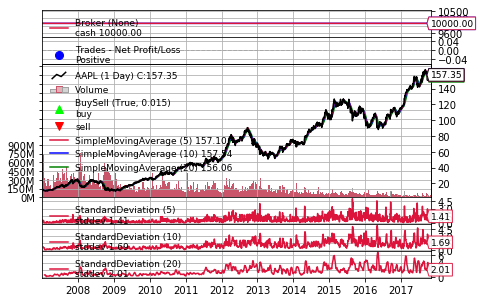

[[<matplotlib.figure.Figure at 0x197ffaf9a58>]]

In [37]:
cerebro = bt.Cerebro()
cerebro.addstrategy(TestStrategy)

data = bt.feeds.YahooFinanceData(
    dataname='AAPL',
    fromdate=datetime(2007, 1, 1),
    todate=datetime(2017, 12, 31),
    reverse=False)
cerebro.adddata(data)
cerebro.broker.setcash(10000.0)

cerebro.addsizer(bt.sizers.PercentSizer, percents=5)
cerebro.broker.setcommission(commission=0.001)
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()